<a href="https://colab.research.google.com/github/PouyaZr/Smile-Detect/blob/master/Smile_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/MyDrive/smile_dataset.zip /content/
!cp /content/gdrive/MyDrive/shape_predictor_68_face_landmarks.dat /content/

In [3]:
import zipfile

ZIP = zipfile.ZipFile('smile_dataset.zip', 'r')
ZIP.extractall()
ZIP.close()

In [4]:
!rm -rf smile_dataset.zip

In [3]:
import cv2
import numpy as np
import dlib
import glob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [13]:
data = []
labels = []

for i, imagePath in enumerate(glob.glob("smile_dataset/*/*")):

  img = cv2.imread(imagePath)

  try:

    faces = detector(img, 1)

    for item in faces:

      (x1, y1) = item.left(), item.top()
      (x2, y2) = item.right(), item.bottom()

      roi = img[y1:y2, x1:x2]
      r_roi = cv2.resize(roi, (32, 32))

      data.append(r_roi)

      label = imagePath.split("/")[-2]
      labels.append(label)

    if i % 100 == 0:
      print(f"[INFO] {i}/4000 processed")  
  except:
    pass

[INFO] 0/4000 processed
[INFO] 100/4000 processed
[INFO] 200/4000 processed
[INFO] 300/4000 processed
[INFO] 400/4000 processed
[INFO] 500/4000 processed
[INFO] 600/4000 processed
[INFO] 700/4000 processed
[INFO] 800/4000 processed
[INFO] 900/4000 processed
[INFO] 1000/4000 processed
[INFO] 1100/4000 processed
[INFO] 1200/4000 processed
[INFO] 1300/4000 processed
[INFO] 1400/4000 processed
[INFO] 1500/4000 processed
[INFO] 1600/4000 processed
[INFO] 1700/4000 processed
[INFO] 1800/4000 processed
[INFO] 1900/4000 processed
[INFO] 2000/4000 processed
[INFO] 2100/4000 processed
[INFO] 2200/4000 processed
[INFO] 2300/4000 processed
[INFO] 2400/4000 processed
[INFO] 2500/4000 processed
[INFO] 2600/4000 processed
[INFO] 2700/4000 processed
[INFO] 2800/4000 processed
[INFO] 2900/4000 processed
[INFO] 3000/4000 processed
[INFO] 3200/4000 processed
[INFO] 3300/4000 processed
[INFO] 3400/4000 processed
[INFO] 3500/4000 processed
[INFO] 3600/4000 processed
[INFO] 3700/4000 processed
[INFO] 3800/4

In [14]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data)/255

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

net = models.Sequential([
                         layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3)),
                         layers.BatchNormalization(),
                         layers.Conv2D(32, (3, 3), activation='relu'),
                         layers.BatchNormalization(),

                         layers.MaxPool2D(),

                         layers.Conv2D(64, (3, 3), activation='relu', input_shape = (32, 32, 3)),
                         layers.BatchNormalization(),
                         layers.Conv2D(32, (3, 3), activation='relu'),
                         layers.BatchNormalization(),

                         layers.MaxPool2D(),

                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.BatchNormalization(),
                         layers.Dense(2, activation='softmax')
                        ])

net.compile(loss = 'binary_crossentropy',
            optimizer = 'sgd',
            metrics = ['accuracy'])

H = net.fit(X_train, y_train, batch_size=16, epochs=30, validation_data = (X_test, y_test))

Epoch 1/30
193/193 [==============================] - 2s 7ms/step - loss: 0.5826 - accuracy: 0.7195 - val_loss: 0.8832 - val_accuracy: 0.4578
Epoch 2/30
193/193 [==============================] - 1s 6ms/step - loss: 0.4061 - accuracy: 0.8386 - val_loss: 0.5874 - val_accuracy: 0.6874
Epoch 3/30
193/193 [==============================] - 1s 6ms/step - loss: 0.3381 - accuracy: 0.8614 - val_loss: 0.3914 - val_accuracy: 0.8314
Epoch 4/30
193/193 [==============================] - 1s 6ms/step - loss: 0.2817 - accuracy: 0.8971 - val_loss: 0.3395 - val_accuracy: 0.8534
Epoch 5/30
193/193 [==============================] - 1s 6ms/step - loss: 0.2414 - accuracy: 0.9075 - val_loss: 0.3371 - val_accuracy: 0.8599
Epoch 6/30
193/193 [==============================] - 1s 6ms/step - loss: 0.2137 - accuracy: 0.9205 - val_loss: 0.3317 - val_accuracy: 0.8742
Epoch 7/30
193/193 [==============================] - 1s 6ms/step - loss: 0.1939 - accuracy: 0.9279 - val_loss: 0.2921 - val_accuracy: 0.8859
Epoch 

In [15]:
net.save("smile_model.h5")

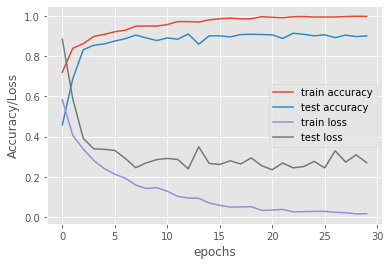

In [16]:
plt.style.use('ggplot')
plt.plot(H.history["accuracy"], label = 'train accuracy')
plt.plot(H.history["val_accuracy"], label = 'test accuracy')
plt.plot(H.history["loss"], label = 'train loss')
plt.plot(H.history["val_loss"], label = 'test loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Accuracy/Loss')
plt.show()

In [25]:
import zipfile

ZIP = zipfile.ZipFile('/content/Val_img.zip', 'r')
ZIP.extractall()
ZIP.close()
!rm -rf Val_img.zip

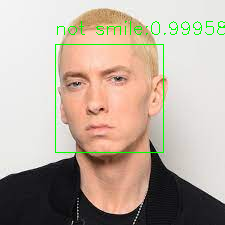

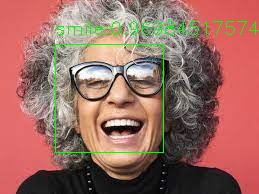

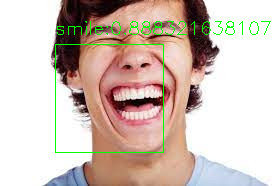

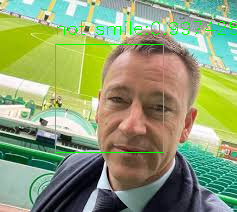

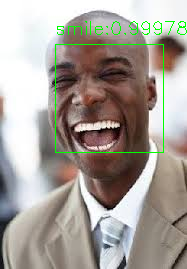

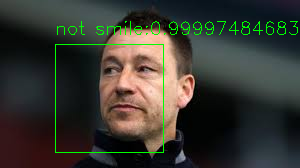

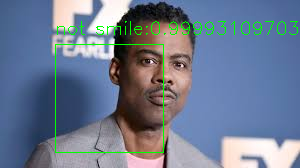

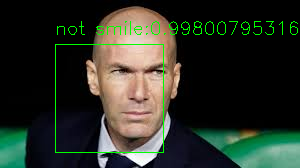

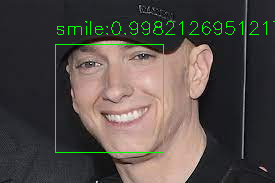

In [66]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import dlib

detector = dlib.get_frontal_face_detector()

net = load_model("smile_model.h5")

labels = ["not smile", "smile"]

for imagePath in glob.glob('Val_img/*'):
  
  img = cv2.imread(imagePath)

  for item in faces:

    (x1, y1) = item.left(), item.top()
    (x2, y2) = item.right(), item.bottom()

    roi = img[y1:y2, x1:x2]
    r_roi = cv2.resize(roi, (32, 32))
    r_roi = r_roi/255.0

    out = net.predict(np.array([r_roi]))[0]

    pred = np.argmax(out)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0))

    cv2.putText(img, f"{labels[pred]}:{out[pred]}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX,
                0.6, (0, 255, 0), 1)
    
    cv2_imshow (img) 
